In [18]:
from measures import pearson
import numpy as np
import pandas as pd
import neurolib
from neurolib.models.aln import ALNModel
from neurolib.utils.loadData import Dataset
import plotly.express as px
import plotly.graph_objs as go
from scipy.interpolate import CubicHermiteSpline, UnivariateSpline, interp1d
from scipy import interpolate
import matplotlib.pyplot as plt

In [ ]:
model = ALNModel()
model.params['sigma_ou'] = 0  # add some noise
model.params['duration'] = 1*1000  # milliseconds
model.run(bold=True)

original_signal = model.output[0]


# Pearson
pearson_results = []
noise_amounts = np.linspace(0, 30, 100)
for noise_amount in noise_amounts:
    signal_noised = original_signal + np.random.normal(0, np.sqrt(noise_amount), len(original_signal))
    pearson_results.append(pearson.pearson([original_signal, signal_noised])[0][1])

plot_df = pd.DataFrame({"Connectivity measure": pearson_results, "Noise amount": noise_amounts})
fig = px.line(plot_df, x="Noise amount", y="Connectivity measure")
fig.show()


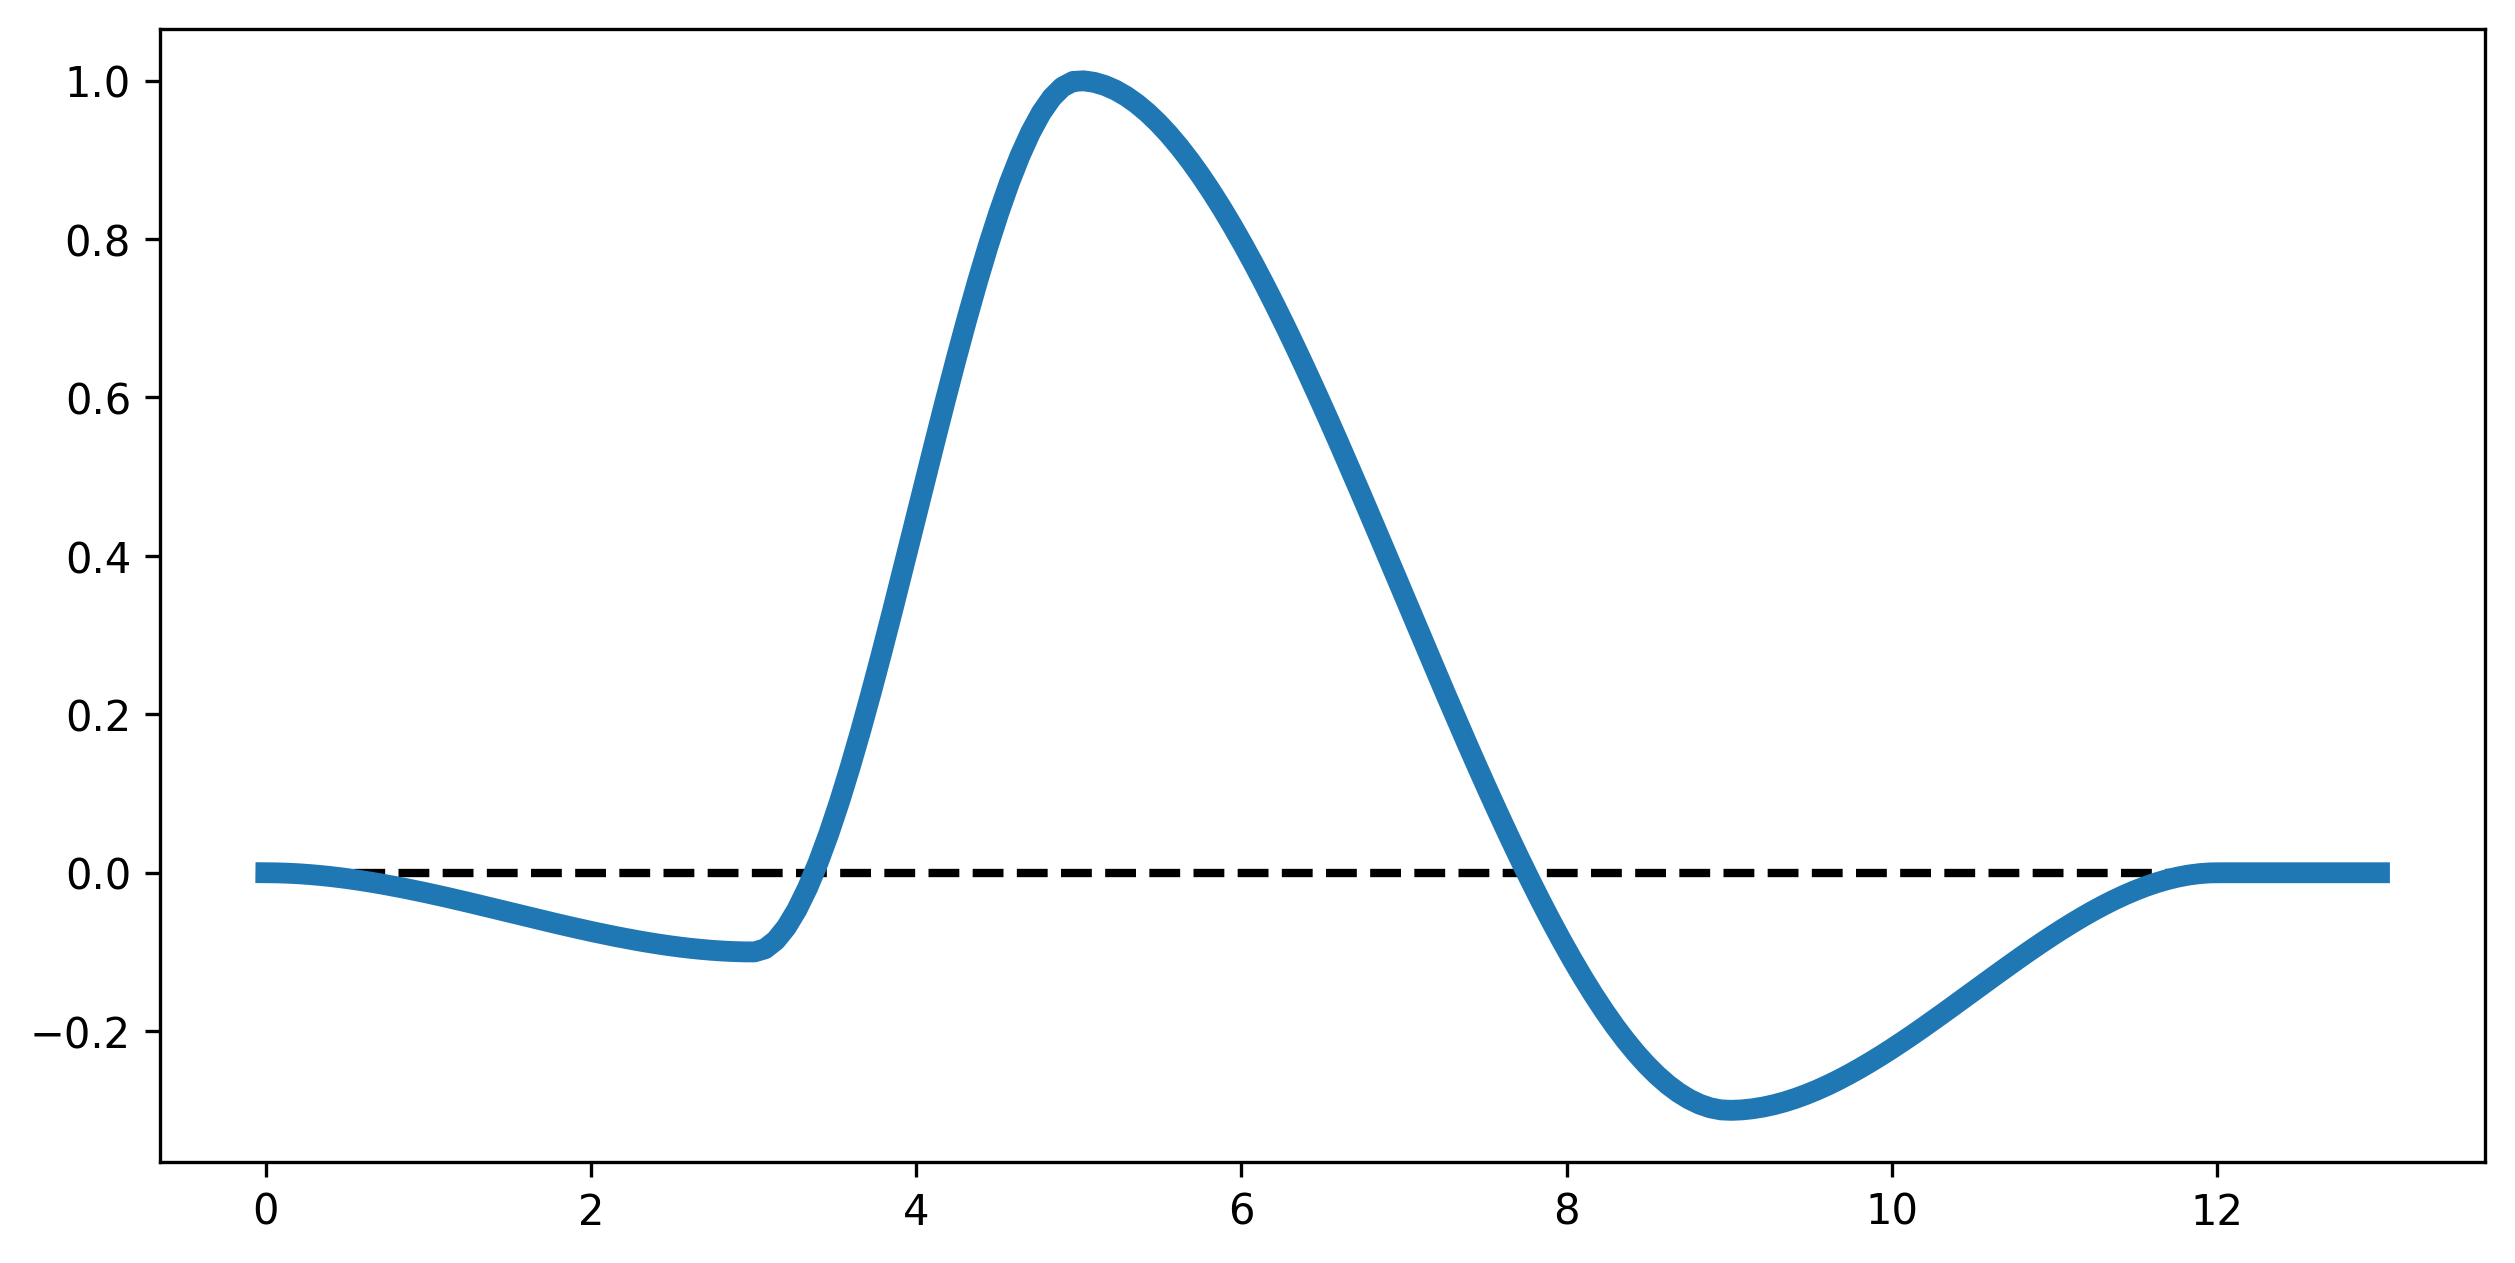

In [59]:
x = [0, 3, 5, 9, 12, 13]
y = [0, -0.1, 1, -0.3,0, 0]

cs = CubicHermiteSpline(x, y, np.zeros(len(x))) # force gradient to zero
xs = np.linspace(min(x), max(x), num=200)

fig, ax = plt.subplots(figsize=(10,5), dpi=300)
ax.plot(x, np.zeros(len(x)), label='data', color="black", linestyle="--", linewidth=2)
ax.plot(xs, cs(xs), label='spline', linewidth=5)
ax.set_xlabel("Čas [s]")